# Maps Plots for Thesis

In [8]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns
from pathlib import Path

data_path = Path.home()/'OneDrive'/'Kirstin'/'Uni'/'Year4'/'MSciProject'/'data_files'

### AGAGE Map

This code makes a map plot with all of the active AGAGE atmospheric monitoring stations. It highlights the two utilised in the project - Mace Head and Gosan.

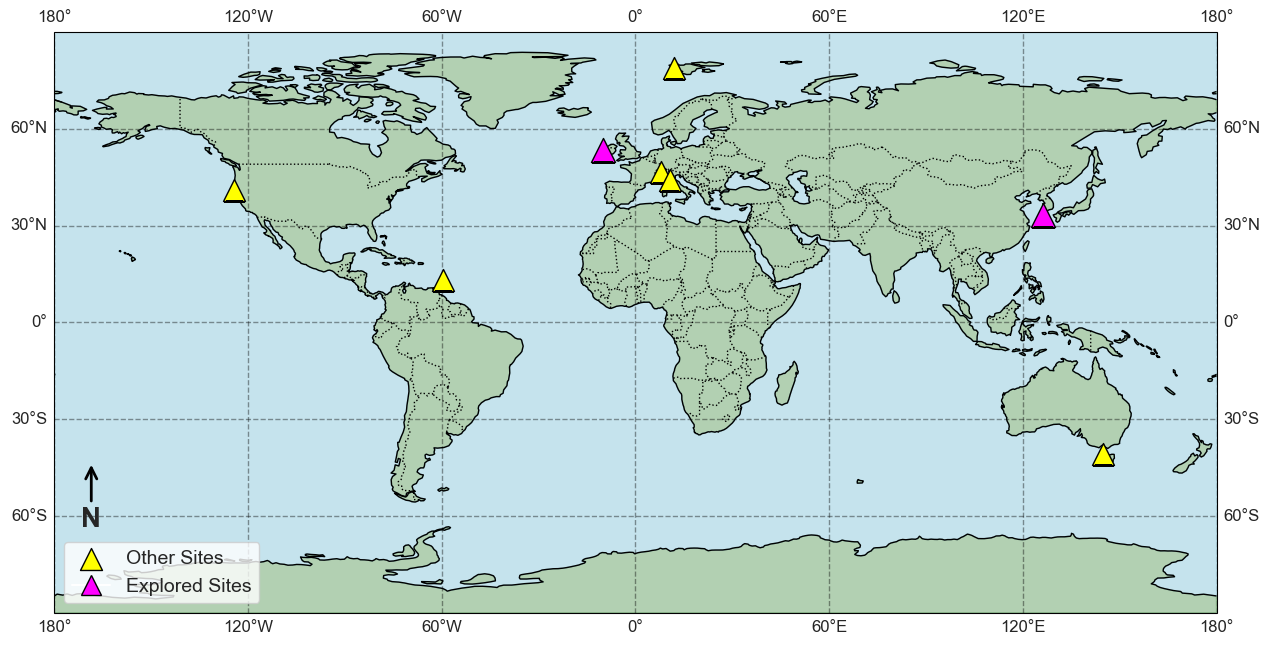

In [2]:
# Coordinates of the AGAGE monitoring stations (taken from https://agage.mit.edu/global-network)
# coordinates of sites explored
coordinates_explored = [(53.3267, -9.9046),  # MHD
                        (33.2924, 126.1616)] # GSN

labels_explored = ['MHD ', 'GSN ']
xytext_values = [(-29, -12.5), (20, -30)]

# coordinates of all sites
coordinates_sites = [(144.6894, -40.6833),   # CGO
                     (-59.4321, 13.1651),    # RPB
                     (7.985883, 46.547767),  # JFJ
                     (10.7014, 44.1932),     # CMN
                     (-124.141, 41.0541),    # THD
                     (11.8867, 78.9072)      # ZEP
                    ]

# creating world map
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(15,15))
sns.set(style='whitegrid')
sns.set_palette("colorblind")

# plotting explored sites and adding labels
for i, ((lat, lon), label) in enumerate(zip(coordinates_explored, labels_explored)):
    ax.scatter(lon, lat, color='magenta', s=300, marker='^', zorder=2, edgecolor='black')
    # ax.annotate(label, (lon, lat), color='black', fontsize=20, ha='center', va='bottom', zorder=3,
                # xytext=xytext_values[i], textcoords='offset points', weight='bold')
    
# plotting other sites
ax.scatter(*zip(*coordinates_sites), c='yellow', s=250, marker='^', zorder=2, label='Other Sites', edgecolor='black')

ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, color='darkgreen', alpha=0.3)
ax.add_feature(cfeature.OCEAN, color='lightblue', alpha=0.7)
ax.set_global()
# ax.set_title('Map Showing the Locations of AGAGE Monitoring Stations', fontsize=15)

# creating legend
handles, labels = ax.get_legend_handles_labels()
handles = [handles[0], plt.Line2D([0], [0], marker='^', color='w', markerfacecolor='magenta', markersize=15, markeredgecolor='black')]
labels = ['Other Sites', 'Explored Sites']

ax.legend(handles=handles, labels=labels, loc='lower left', fontsize=14)

# add a north arrow
arrow_props = dict(facecolor='black', arrowstyle='->', edgecolor='black', linewidth=2)

ax.annotate('N', xy=(0.032, 0.26), xycoords='axes fraction', size=20, weight='bold',
            xytext=(0.032, 0.16), textcoords='axes fraction',
            arrowprops=arrow_props,
            horizontalalignment='center', verticalalignment='center')

# adding gridliens
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='black', alpha=0.4, linestyle='--', zorder=1)

plt.show()

### Grid System Map

This produces a map with the coordinates of the 17-point grid system created around Mace Head, Ireland.

In [6]:
# initialising data
# importing one year of ECMWF data that has been interpolated to 17-point grid system - 2015
ecmwf_2015 = xr.open_dataset(data_path/'meteorological_data'/'ECMWF'/'MHD'/'10m_wind_grid'/'10m_u_2015.nc').sel(time=slice("2015-01-01 00:00:00")).to_dataframe()

# creating coordinates for each point based on the point index of dataframe
lats = []
lons = []

for point in ecmwf_2015.index.get_level_values('points').unique():
    lat = ecmwf_2015.iloc[point].latitude
    lon = ecmwf_2015.iloc[point].longitude

    lats.append(lat)
    lons.append(lon)

most_east = max(lons)
most_west = min(lons)
most_north = max(lats)
most_south = min(lats)

c:\Users\kirst\OneDrive\Kirstin\Uni\Year4\MSciProject\my_code\optimising_algorithm\venv\Lib\site-packages\xarray\backends\plugins.py:80: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


c:\Users\kirst\OneDrive\Kirstin\Uni\Year4\MSciProject\my_code\optimising_algorithm\venv\Lib\site-packages\cartopy\mpl\geoaxes.py:1696: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  result = super().scatter(*args, **kwargs)


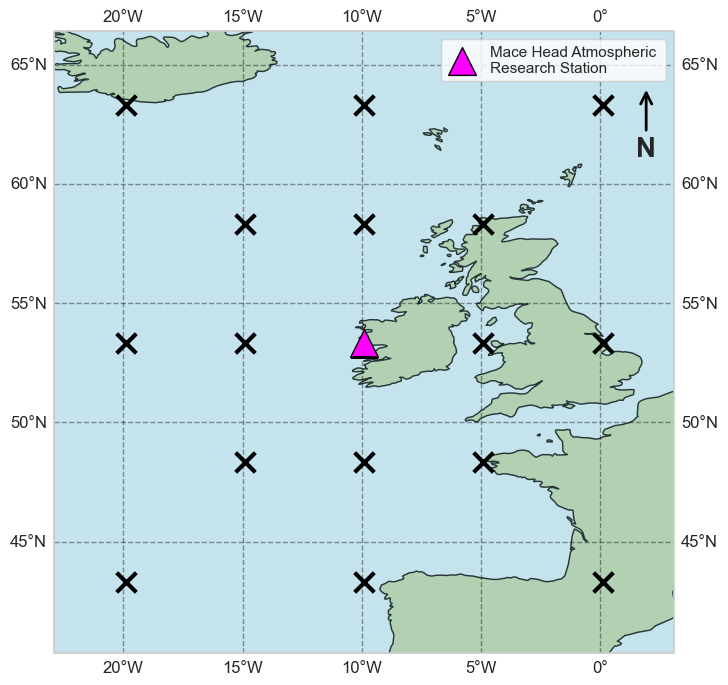

In [9]:
# plotting grid points on map
fig, ax = plt.subplots(figsize=(8,15), subplot_kw={'projection':cartopy.crs.PlateCarree()})
img_extent = ((most_west-3), (most_east+3), (most_south-3), (most_north+3))
ax.set_extent(img_extent)

ax.coastlines(resolution='50m', color='black', linewidth=1, alpha=0.75)
ax.add_feature(cfeature.LAND, color='darkgreen', alpha=0.3)
ax.add_feature(cfeature.OCEAN, color='lightblue', alpha=0.7)

ax.scatter(lons[1:], lats[1:], transform=cartopy.crs.PlateCarree(), 
           s=200, color='black', marker='x', linewidth=3, zorder=10, edgecolor='black')

mhd_lat = ecmwf_2015.iloc[0].latitude
mhd_lon = ecmwf_2015.iloc[0].longitude

ax.scatter(mhd_lon, mhd_lat, s=400, color='magenta', marker='^', label="Mace Head Atmospheric \nResearch Station", 
           alpha=1, zorder=12, edgecolor='black')

ax.legend(loc="upper right")

# add a north arrow
arrow_props = dict(facecolor='black', arrowstyle='->', edgecolor='black', linewidth=2)

ax.annotate('N', xy=(0.955, 0.91), xycoords='axes fraction', size=20, weight='bold',
            xytext=(0.955, 0.81), textcoords='axes fraction',
            arrowprops=arrow_props,
            horizontalalignment='center', verticalalignment='center')


# add gridlines
gl = ax.gridlines(crs=cartopy.crs.PlateCarree(), draw_labels=True, linewidth=1, color='black', alpha=0.4, linestyle='--')

plt.show()